In [0]:
import pandas as pd

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
id=pd.read_excel('/content/gdrive/My Drive/data/Amex/Data_Dictionary.xlsx')

In [0]:
id.head(2)

,Unnamed: 0,Variable Name,Definition,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,names
0,VAR1,ID,The identifier for the account,use,doubt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAR1-ID
1,VAR2,FICO,Credit score associated with account. Takes in...,for credit wortiness->prob of default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAR2-FICO


In [0]:
# names=id['Unnamed: 0']+id['Variable Name']
id['names']=id['Unnamed: 0'].str.cat(id['Variable Name'] , sep='-')

In [0]:
id['names']

0                          VAR1-ID
1                        VAR2-FICO
2            VAR3-Business Revenue
3                         VAR4-TSR
4            VAR5-Last 6M Avg Util
5                      VAR6-Income
6           VAR7-Last 6M Avg Remit
7             VAR8-Last 6M Avg Bal
8            VAR9-Internal Revolve
9     VAR10-Lending AR% in last 6M
10           VAR11-ExternalBalance
11        VAR12-Months in Business
12      VAR13-preferred_spend_line
13               VAR14-total_cards
14        VAR15-preferred_bal_line
15        VAR16-preavgremit1_3_all
16         VAR17-External_rev_rate
17       VAR18-Supplementary Cards
18              VAR19-isChargeCust
19                       VAR20-CMV
20             VAR21-Assigned Line
21                             NaN
22                             NaN
23                             NaN
24                             NaN
25                             NaN
26                             NaN
Name: names, dtype: object

In [0]:
# names=list(id['Variable Name'])

names=list(id['names'])[0:21]
print(names)

['VAR1-ID', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR', 'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit', 'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve', 'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance', 'VAR12-Months in Business', 'VAR13-preferred_spend_line', 'VAR14-total_cards', 'VAR15-preferred_bal_line', 'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate', 'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV', 'VAR21-Assigned Line']


In [0]:
train=pd.read_csv('/content/gdrive/My Drive/data/Amex/development_dataset.csv', names=names, skiprows=1)

In [0]:
train.head()

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR14-total_cards,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV,VAR21-Assigned Line
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1-ID                         34000 non-null int64
VAR2-FICO                       33039 non-null float64
VAR3-Business Revenue           30615 non-null float64
VAR4-TSR                        21506 non-null float64
VAR5-Last 6M Avg Util           33999 non-null float64
VAR6-Income                     30505 non-null float64
VAR7-Last 6M Avg Remit          33165 non-null float64
VAR8-Last 6M Avg Bal            33165 non-null float64
VAR9-Internal Revolve           18183 non-null float64
VAR10-Lending AR% in last 6M    29450 non-null float64
VAR11-ExternalBalance           26435 non-null float64
VAR12-Months in Business        23498 non-null float64
VAR13-preferred_spend_line      25478 non-null float64
VAR14-total_cards               34000 non-null object
VAR15-preferred_bal_line        25976 non-null float64
VAR16-preavgremit1_3_all        33134 non-null float64
VAR17-External

In [0]:
train.describe()

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [0]:
from scipy.stats import mode
mode(train)

ModeResult(mode=array([[1, 956.4705882000001, 0.111111111, 321.42857139999995,
        611.5747476, 9.090909091, 0.559709593, 196.9112949, 22.08666116,
        47.89968639, 0.018017618, 40.03336113, 10.0, '1', 13.33333333,
        0.95931523, 1000.0, 0, 0, 96.04130809, 'Medium']], dtype=object), count=array([[    1,   425,  1522,   189,  7865,  2528,   671,   533,   506,
          466,    14,   642,   688, 20816,   374,   434,    46, 22806,
        23866,   257, 18172]]))

In [0]:
any(train['VAR1-ID'].duplicated())

False

In [0]:
train.isnull().sum().sort_values(ascending=False) #amount of NaNs per column

VAR17-External_rev_rate         22194
VAR9-Internal Revolve           15817
VAR4-TSR                        12494
VAR12-Months in Business        10502
VAR13-preferred_spend_line       8522
VAR15-preferred_bal_line         8024
VAR11-ExternalBalance            7565
VAR10-Lending AR% in last 6M     4550
VAR6-Income                      3495
VAR3-Business Revenue            3385
VAR2-FICO                         961
VAR16-preavgremit1_3_all          866
VAR8-Last 6M Avg Bal              835
VAR7-Last 6M Avg Remit            835
VAR5-Last 6M Avg Util               1
VAR21-Assigned Line                 0
VAR20-CMV                           0
VAR14-total_cards                   0
VAR18-Supplementary Cards           0
VAR19-isChargeCust                  0
VAR1-ID                             0
dtype: int64

In [0]:
train.isnull().mean().round(4).sort_values(ascending=False) * 100 #amount of NaNs per column

VAR17-External_rev_rate         65.28
VAR9-Internal Revolve           46.52
VAR4-TSR                        36.75
VAR12-Months in Business        30.89
VAR13-preferred_spend_line      25.06
VAR15-preferred_bal_line        23.60
VAR11-ExternalBalance           22.25
VAR10-Lending AR% in last 6M    13.38
VAR6-Income                     10.28
VAR3-Business Revenue            9.96
VAR2-FICO                        2.83
VAR16-preavgremit1_3_all         2.55
VAR8-Last 6M Avg Bal             2.46
VAR7-Last 6M Avg Remit           2.46
VAR5-Last 6M Avg Util            0.00
VAR21-Assigned Line              0.00
VAR20-CMV                        0.00
VAR14-total_cards                0.00
VAR18-Supplementary Cards        0.00
VAR19-isChargeCust               0.00
VAR1-ID                          0.00
dtype: float64

In [0]:
train.isnull().sum(axis=1).value_counts()#sum number of NaNs per row and then calculate number of rows with no NaNs, 1 NaN, 2 NaNs and so on

2     8404
1     7125
3     5747
4     3003
5     2882
6     2429
0     2059
7     1378
8      649
9      225
10      77
11      21
12       1
dtype: int64

In [0]:
import missingno as msno 

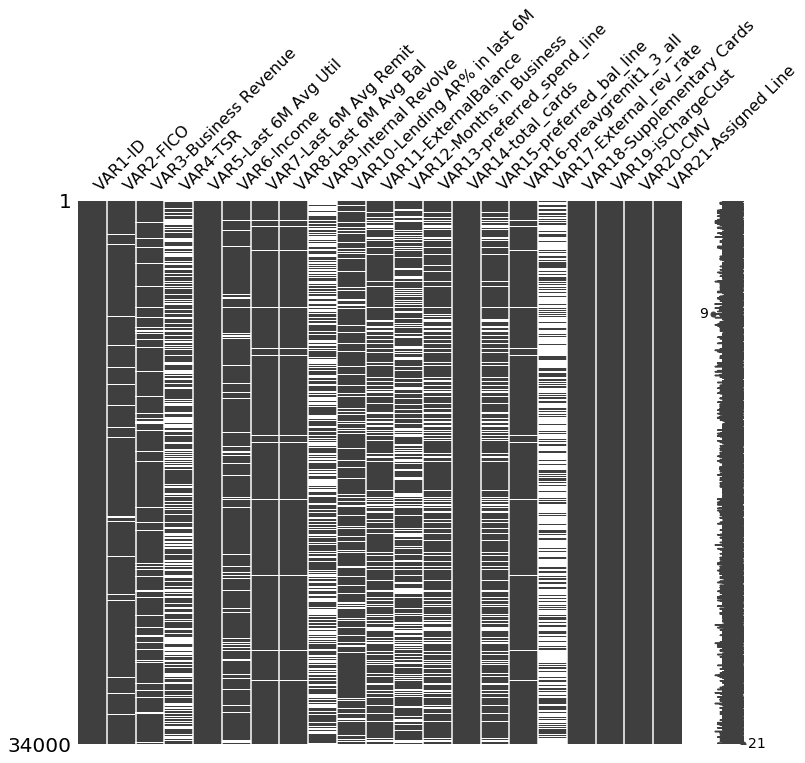

In [0]:
msno.matrix(train, figsize=(12,10));

In [0]:
Using this matrix you can very quickly find the pattern of missingness in the dataset. In our example, the columns V8 and V7 have a similar pattern of missing values while V17 shows a different pattern.

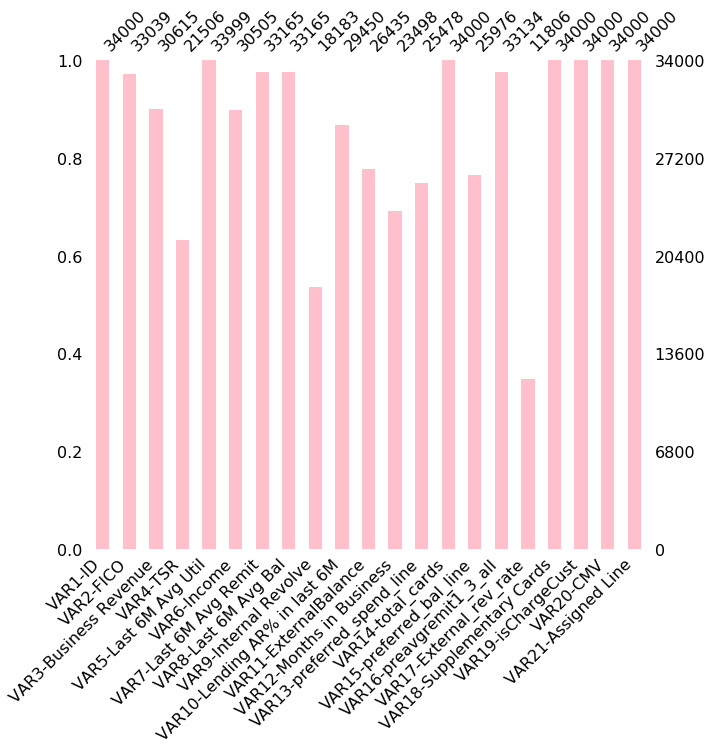

In [0]:
msno.bar(train, figsize=(10,9), color ='pink')

In [0]:
This bar chart gives you an idea about how many missing values are there in each column. In our example, V17 and V9 contain the most number of missing values followed by UCZAA.

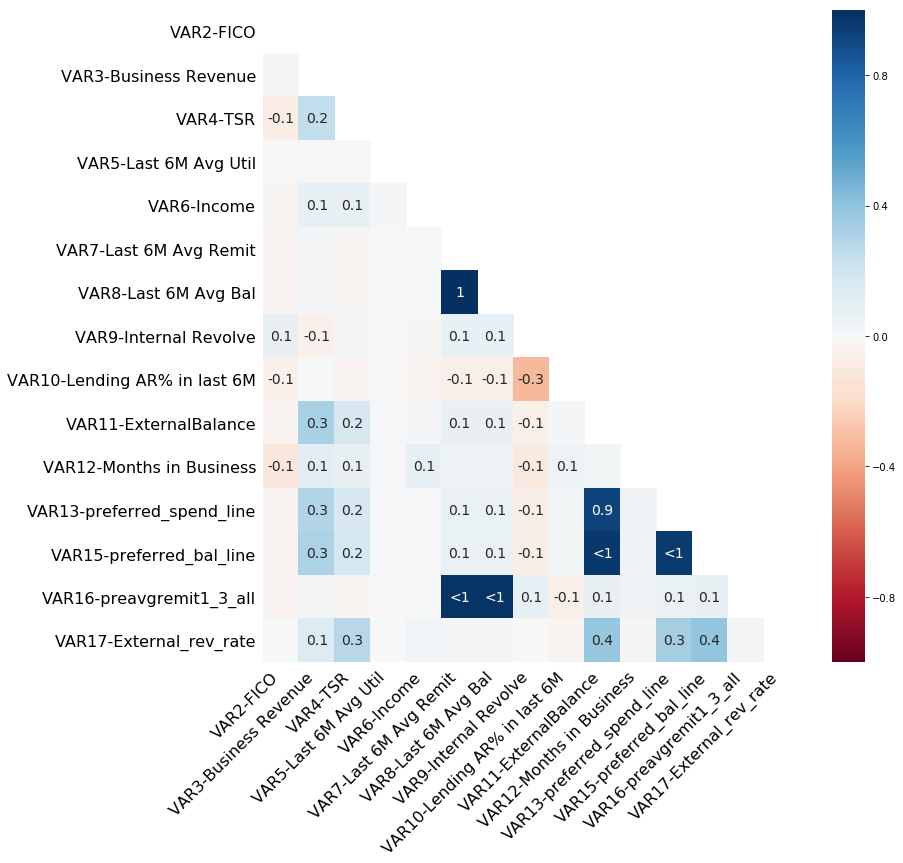

In [0]:
msno.heatmap(train, figsize=(12,12), cmap = plt.cm.RdBu);

Heatmap shows the correlation of missingness between every 2 columns. In our example, the correlation between V8 and V7 is 1 which means if one of them is present then the other one must be present.

A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.

In [0]:
# df.loc[:, ['col1', 'col2']].isnull().sum(axis=1).value_counts()#no. of NaNs in rows but in specific columns only

In [0]:
train['VAR21-Assigned Line'].hist()

In [0]:
hi=train.groupby('VAR21-Assigned Line').size()/len(train)*100

In [0]:
hid=pd.DataFrame(hi)
print(hid)

                             0
VAR21-Assigned Line           
High                 11.020588
Low                  35.532353
Medium               53.447059


In [0]:
import matplotlib.pyplot as plt


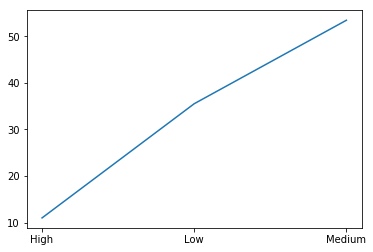

In [0]:
plt.plot(hid);

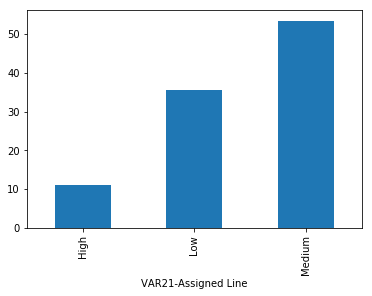

In [0]:
hid.plot(kind='bar', legend=False);

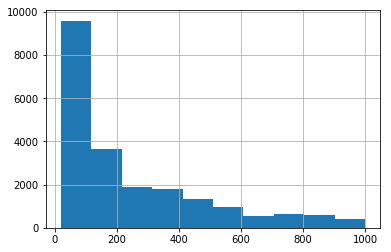

In [0]:
train['VAR4-TSR'].hist();

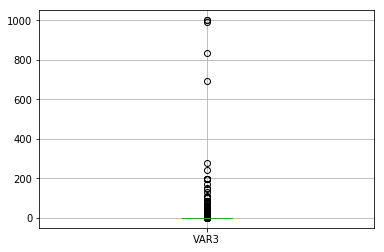

In [0]:
train.boxplot(column='VAR3');

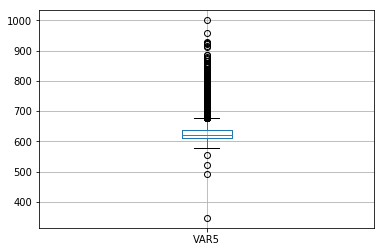

In [0]:
train.boxplot(column='VAR5');

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

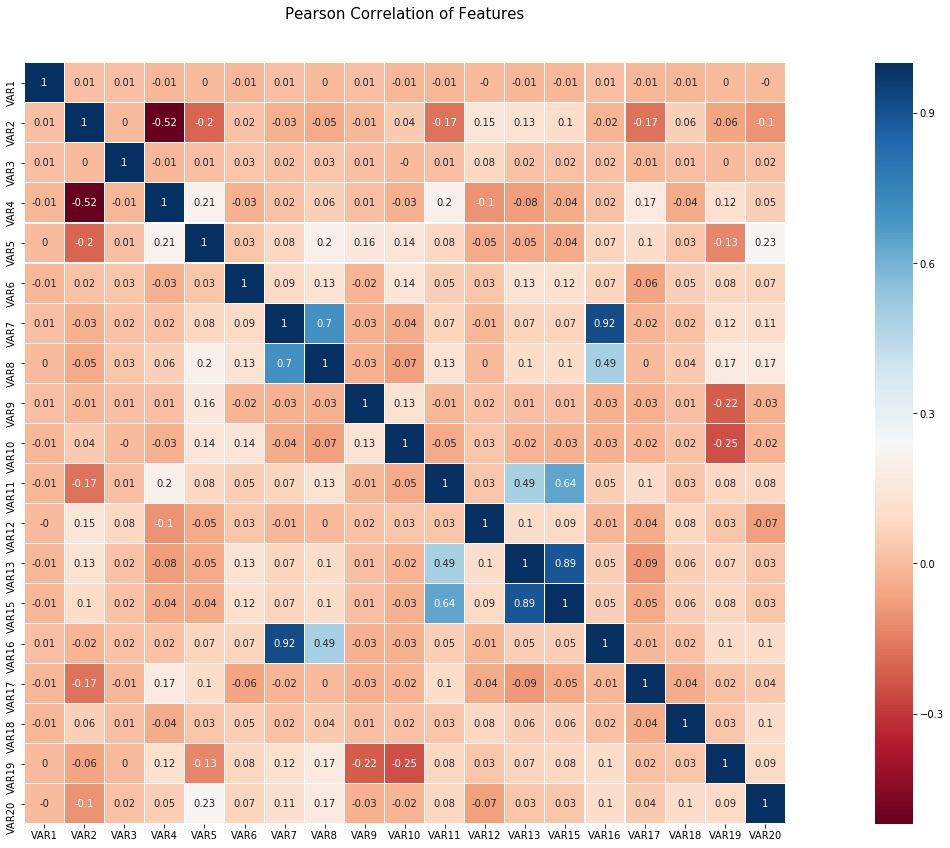

In [0]:
colormap = plt.cm.RdBu
data=train.corr().round(2)
plt.figure(figsize=(32,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [0]:
train.VAR21.dtypes

dtype('O')

In [0]:
Train=train.copy()

In [0]:
Train.drop(columns='VAR14',inplace=True, axis=1)

In [0]:
Train["VAR21"] = Train["VAR21"].astype('category')

In [0]:
Train["VAR21"] = Train["VAR21"].cat.codes

In [0]:
Train.VAR21.value_counts()

2    18172
1    12081
0     3747
Name: VAR21, dtype: int64

In [0]:
from fancyimpute import KNN 
#fancy impute removes column names.
train_cols = list(Train)

# Use 5 nearest rows which have a feature to fill in each row's missing features
train1 = pd.DataFrame(KNN(k=5).fit_transform(Train))
train1.columns = train_cols

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


Imputing row 1/34000 with 2 missing, elapsed time: 278.790
Imputing row 101/34000 with 1 missing, elapsed time: 278.870
Imputing row 201/34000 with 2 missing, elapsed time: 278.953
Imputing row 301/34000 with 2 missing, elapsed time: 279.033
Imputing row 401/34000 with 6 missing, elapsed time: 279.114
Imputing row 501/34000 with 2 missing, elapsed time: 279.198
Imputing row 601/34000 with 3 missing, elapsed time: 279.275
Imputing row 701/34000 with 3 missing, elapsed time: 279.358
Imputing row 801/34000 with 2 missing, elapsed time: 279.445
Imputing row 901/34000 with 0 missing, elapsed time: 279.517
Imputing row 1001/34000 with 1 missing, elapsed time: 279.597
Imputing row 1101/34000 with 2 missing, elapsed time: 279.670
Imputing row 1201/34000 with 2 missing, elapsed time: 279.758
Imputing row 1301/34000 with 4 missing, elapsed time: 279.833
Imputing row 1401/34000 with 4 missing, elapsed time: 279.910
Imputing row 1501/34000 with 4 missing, elapsed time: 279.985
Imputing row 1601/34

In [0]:
train1['VAR14']=train['VAR14']

In [0]:
train1.to_csv('/content/gdrive/My Drive/data/Amex/imputedfile.csv')


In [0]:
list(Train)

['VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21']

In [0]:
Train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR17', 'VAR18',
       'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [0]:
train1.isnull().sum()

VAR1     0
VAR2     0
VAR3     0
VAR4     0
VAR5     0
VAR6     0
VAR7     0
VAR8     0
VAR9     0
VAR10    0
VAR11    0
VAR12    0
VAR13    0
VAR15    0
VAR16    0
VAR17    0
VAR18    0
VAR19    0
VAR20    0
VAR21    0
VAR14    0
dtype: int64